# The effect of Sampling

## Fig 10.4

In [1]:
"""
The effect of Sampling
----------------------
Figure 10.4

An illustration of the impact of a sampling window function of resulting PSD.
The top-left panel shows a simulated data set with 40 points drawn from the
function y(t|P) = sin(t) (i.e., f = 1/(2pi) ~ 0.16). The sampling is random,
and illustrated by the vertical lines in the bottom-left panel. The PSD of
sampling times, or spectral window, is shown in the bottom-right panel. The
PSD computed for the data set from the top-left panel is shown in the top-right
panel; it is equal to a convolution of the single peak (shaded in gray) with
the window PSD shown in the bottom-right panel (e.g., the peak at f ~ 0.42 in
the top-right panel can be traced to a peak at f ~ 0.26 in the bottom-right
panel).
"""

'\nThe effect of Sampling\n----------------------\nFigure 10.4\n\nAn illustration of the impact of a sampling window function of resulting PSD.\nThe top-left panel shows a simulated data set with 40 points drawn from the\nfunction y(t|P) = sin(t) (i.e., f = 1/(2pi) ~ 0.16). The sampling is random,\nand illustrated by the vertical lines in the bottom-left panel. The PSD of\nsampling times, or spectral window, is shown in the bottom-right panel. The\nPSD computed for the data set from the top-left panel is shown in the top-right\npanel; it is equal to a convolution of the single peak (shaded in gray) with\nthe window PSD shown in the bottom-right panel (e.g., the peak at f ~ 0.42 in\nthe top-right panel can be traced to a peak at f ~ 0.26 in the bottom-right\npanel).\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Generate the data

In [7]:
#------------------------------------------------------------
# Generate the data
Nbins = 2 ** 15
Nobs = 40
f = lambda t: np.sin(np.pi * t / 3)

t = np.linspace(-100, 200, Nbins)
dt = t[1] - t[0]
y = f(t)

# select observations
np.random.seed(42)
t_obs = 100 * np.random.random(40)

D = abs(t_obs[:, np.newaxis] - t)
i = np.argmin(D, 1)

t_obs = t[i]
y_obs = y[i]
window = np.zeros(Nbins)
window[i] = 1


# Compute PSDs

In [8]:
#------------------------------------------------------------
# Compute PSDs
Nfreq = int(Nbins / 2)

dt = t[1] - t[0]
df = 1. / (Nbins * dt)
f = df * np.arange(Nfreq)

PSD_window = abs(np.fft.fft(window)[:Nfreq]) ** 2
PSD_y = abs(np.fft.fft(y)[:Nfreq]) ** 2
PSD_obs = abs(np.fft.fft(y * window)[:Nfreq]) ** 2

# normalize the true PSD so it can be shown in the plot:
# in theory it's a delta function, so normalization is
# arbitrary

# scale PSDs for plotting
PSD_window /= 500
PSD_y /= PSD_y.max()
PSD_obs /= 500


# Prepare the figures

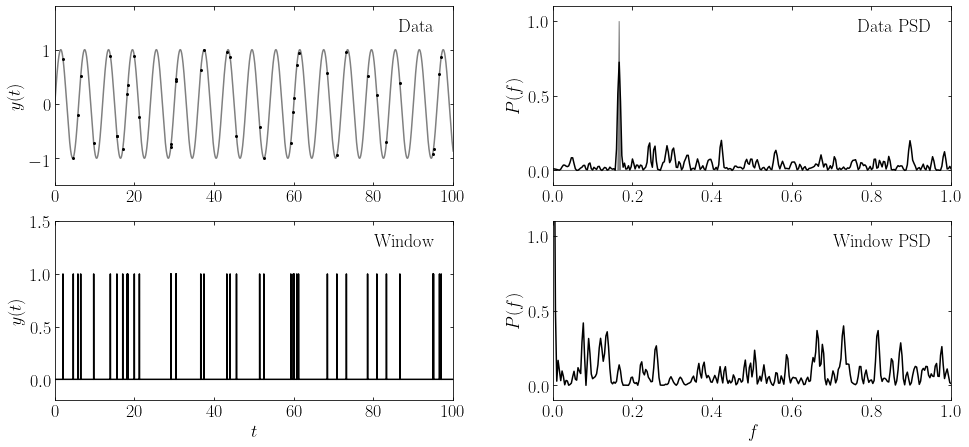

In [10]:
#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(15, 7.5))
fig.subplots_adjust(bottom=0.15, hspace=0.2, wspace=0.25,
                    left=0.12, right=0.95)

# First panel: data vs time
ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.plot(t_obs, y_obs, '.k', ms=4)
ax.text(0.95, 0.93, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylabel('$y(t)$')
ax.set_xlim(0, 100)
ax.set_ylim(-1.5, 1.8)

# Second panel: PSD of data
ax = fig.add_subplot(222)
ax.fill(f, PSD_y, fc='gray', ec='gray')
ax.plot(f, PSD_obs, '-', c='black')
ax.text(0.95, 0.93, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylabel('$P(f)$')
ax.set_xlim(0, 1.0)
ax.set_ylim(-0.1, 1.1)

# Third panel: window vs time
ax = fig.add_subplot(223)
ax.plot(t, window, '-', c='black')
ax.text(0.95, 0.93, "Window", ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.set_xlim(0, 100)
ax.set_ylim(-0.2, 1.5)

# Fourth panel: PSD of window
ax = fig.add_subplot(224)
ax.plot(f, PSD_window, '-', c='black')
ax.text(0.95, 0.93, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel('$f$')
ax.set_ylabel('$P(f)$')
ax.set_xlim(0, 1.0)
ax.set_ylim(-0.1, 1.1)

plt.show()
